In [206]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [226]:
!git push origin main


error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/hrouzegar/Machine-Learning.git'


In [2]:
import pandas as pd
pd.set_option("max_colwidth", 100)
pd.set_option("display.max_rows",10)
pd.set_option("display.max_columns",3)
DS= pd.read_csv('/content/drive/MyDrive/IMDB_Sentiment/IMDB Dataset.csv');
df= pd.DataFrame(DS,columns =['review', 'sentiment']);
df


,review,sentiment
0,One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked....,positive
1,A wonderful little production. <br /><br />The filming technique is very unassuming- very old-ti...,positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air...",positive
3,Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei off...",positive
...,...,...
49995,"I thought this movie did a down right good job. It wasn't as creative or original as the first, ...",positive
49996,"Bad plot, bad dialogue, bad acting, idiotic directing, the annoying porn groove soundtrack that ...",negative
49997,"I am a Catholic taught in parochial elementary schools by nuns, taught by Jesuit priests in high...",negative
49998,I'm going to have to disagree with the previous comment and side with Maltin on this one. This i...,negative


In [3]:
import re
import string

def clean_text1(text):
    
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', ' ', text)
    return text
round1 = lambda x: clean_text1(x)
df["review"] = pd.DataFrame(df.review.apply(round1))
df

,review,sentiment
0,one of the other reviewers has mentioned that after watching just oz episode youll be hooked th...,positive
1,a wonderful little production br br the filming technique is very unassuming very oldtimebbc fas...,positive
2,i thought this was a wonderful way to spend time on a too hot summer weekend sitting in the air ...,positive
3,basically theres a family where a little boy jake thinks theres a zombie in his closet his pare...,negative
4,petter matteis love in the time of money is a visually stunning film to watch mr mattei offers u...,positive
...,...,...
49995,i thought this movie did a down right good job it wasnt as creative or original as the first but...,positive
49996,bad plot bad dialogue bad acting idiotic directing the annoying porn groove soundtrack that ran ...,negative
49997,i am a catholic taught in parochial elementary schools by nuns taught by jesuit priests in high ...,negative
49998,im going to have to disagree with the previous comment and side with maltin on this one this is ...,negative


Stemming





In [4]:

# import nltk
# nltk.download('punkt')

In [5]:
# import nltk
# from nltk.stem import PorterStemmer
# from nltk.tokenize import word_tokenize
# porter = PorterStemmer()
# def clean_text2(text):
#     token_words=word_tokenize(text);
#     stem_sentence=[]
#     for word in token_words:
#         stem_sentence.append(porter.stem(word))
#         stem_sentence.append(" ")
#     return "".join(stem_sentence)

# round2 = lambda x: clean_text2(x)
# df["review"] = pd.DataFrame(df.review.apply(round2))
# df

Remove stop words

In [6]:
# nltk.download("stopwords")

In [7]:
# from nltk.corpus import stopwords
# def clean_text3(text):
#   token_words=word_tokenize(text);
#   tokens_without_sw = [word for word in token_words if not word in stopwords.words('english')];
#   filtered_sentence = (" ").join(tokens_without_sw);
#   return filtered_sentence
# round3 = lambda x: clean_text3(x)
# df["review"] = pd.DataFrame(df.review.apply(round3))
# df

In [8]:
X=df["review"]
Y=df["sentiment"]

In [54]:
import numpy as np
from sklearn.model_selection import train_test_split
k= 0.05;
test= 0.05;

In [69]:
x=X;
y=Y;

In [70]:
x_train=[None]*2;
y_train=[None]*2;

In [104]:
Test_size=int(test*X.count());
# x , x_test , y , y_test = train_test_split(x,y,test_size=Test_size,shuffle=False);
# x , x_test , y , y_test = train_test_split(x,y,test_size=Test_size,shuffle=True,random_state=100);
# x , x_test , y , y_test = train_test_split(x,y,test_size=Test_size,shuffle=True,random_state=120);
# x , x_test , y , y_test = train_test_split(x,y,test_size=Test_size,shuffle=True,random_state=130);
x , x_test , y , y_test = train_test_split(x,y,test_size=Test_size,shuffle=True,random_state=140);

In [105]:
train_size= int(k*X.count())
x_train[0] , x_train[1] , y_train[0] , y_train[1] = train_test_split(x,y,train_size=train_size,shuffle=False);

This part used for applying several models

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
LR = LogisticRegression(penalty='l2', dual=False, tol=0.01, C=1, fit_intercept=True,
                        intercept_scaling=1, class_weight=None,random_state=None, solver='liblinear',
                        max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None);
# LR = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=10.0, fit_intercept=True,
#                         intercept_scaling=1, class_weight=None,random_state=None, solver='liblinear',
#                         max_iter=1500, multi_class='ovr', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None);
# LR=DecisionTreeClassifier( criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
#                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None,
#                           max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0);
# LRR=RandomForestClassifier(n_estimators=100,  criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1,
#                           min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0,
#                           bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False,
#                           class_weight=None, ccp_alpha=0.0, max_samples=None);  
# LRR=GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse',
#                               min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
#                               min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0,
#                               max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None,
#                               tol=0.0001, ccp_alpha=0.0);
# LRR=SVC( C=1.0, kernel='linear', degree=1, gamma='scale', coef0=0.0, shrinking=True,
#          probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False,
#          max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None);
# LRR=MLPClassifier(hidden_layer_sizes=(100,), activation='relu',solver='adam', alpha=0.0001, batch_size='auto',
#               learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True,
#               random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
#               early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000);

vectorization = TfidfVectorizer();

In [107]:
xv= vectorization.fit_transform(x_train[0]);
xv_test = vectorization.transform(x_test);
LR.fit(xv,y_train[0]);
acc_Unchanged_Train_on_Test=LR.score(xv_test,y_test)
acc_Unchanged_Train_on_Test

0.8388

In [108]:
xv_test = vectorization.transform(x_train[1]);
acc_Unchanged_Train=LR.score(xv_test,y_train[1])
acc_Unchanged_Train

0.8343466666666667

This part for avoid overfitting

In [109]:
xv_test = vectorization.transform(x_train[0]);
acc_Unchanged_Train_on_Train=LR.score(xv_test,y_train[0])
acc_Unchanged_Train_on_Train

0.9608

In [110]:
1-(test+k)

0.9

med border illustrates the portion of data to add next iterate

In [111]:
size_of_iteration =20;
acc_Changed_Train_Remained=[0]*(size_of_iteration+1);
acc_Changed_Train_On_Test=[0]*(size_of_iteration+1);
acc_Changed_Train_On_New_Test=[0]*(size_of_iteration+1);
acc_different_portion=[0]*(size_of_iteration+1);
acc_different_portion_On_Test=[0]*(size_of_iteration+1);
med_border=0.025
Train_count=y_train[0].count();
med_fix_count=X.size*med_border

The active learning part

In [112]:


Removed_new_x=x_train[1];
Removed_new_y=y_train[1];

Removed_test_new_x=x_test;
Removed_test_new_y=y_test;

NewTrain_x=x_train[0];
NewTrain_y=y_train[0];



for z in range(size_of_iteration):

  xv= vectorization.fit_transform(NewTrain_x);
  xv_test = vectorization.transform(Removed_new_x);
  LR.fit(xv,NewTrain_y);
  prediction= LR.predict(xv_test);
  prob=LR.predict_proba(xv_test)
  xv_test = vectorization.transform(Removed_test_new_x);
  prob2=LR.predict_proba(xv_test)

  i=0;
  Dec_point=10000000;
  while(np.logical_and(i/Dec_point<1,(np.count_nonzero
                                      (np.logical_and(prob[:,1]>(.5-(i/Dec_point)),
                                                      prob[:,1]<(.5+(i/Dec_point)))))<med_fix_count)):
    i=i+1
  percentage1=i/Dec_point



  True_vector1=np.logical_and(prob[:,1]>.5-percentage1, prob[:,1]<.5+percentage1)
  Adding_med_x=True_vector1*Removed_new_x
  Adding_med_x.replace('', np.nan, inplace=True)
  Adding_med_x.dropna(inplace=True)
  Adding_med_y=True_vector1*Removed_new_y
  Adding_med_y.replace('', np.nan, inplace=True)
  Adding_med_y.dropna(inplace=True)
  True_vector1_test=np.logical_and(prob2[:,1]>.5-percentage1, prob2[:,1]<.5+percentage1)
  Adding_med_x_test=True_vector1_test*Removed_test_new_x
  Adding_med_x_test.replace('', np.nan, inplace=True)
  Adding_med_x_test.dropna(inplace=True)
  Adding_med_y_test=True_vector1_test*Removed_test_new_y
  Adding_med_y_test.replace('', np.nan, inplace=True)
  Adding_med_y_test.dropna(inplace=True)

  NewTrain_x=pd.concat([NewTrain_x,Adding_med_x], ignore_index=True);
  NewTrain_y=pd.concat([NewTrain_y,Adding_med_y], ignore_index=True);

  True_vector_test_removing=np.logical_not(True_vector1_test)
  Removed_test_new_x=True_vector_test_removing*Removed_test_new_x
  Removed_test_new_x.replace('', np.nan, inplace=True)
  Removed_test_new_x.dropna(inplace=True)
  Removed_test_new_y=True_vector_test_removing*Removed_test_new_y
  Removed_test_new_y.replace('', np.nan, inplace=True)
  Removed_test_new_y.dropna(inplace=True)



  True_vector_test=np.logical_not(True_vector1)
  Removed_new_x=True_vector_test*Removed_new_x
  Removed_new_y=True_vector_test*Removed_new_y


  Removed_new_x.replace('', np.nan, inplace=True)
  Removed_new_x.dropna(inplace=True)
  Removed_new_y.replace('', np.nan, inplace=True)
  Removed_new_y.dropna(inplace=True)

  print(NewTrain_x.size)
  print(Removed_new_x.size)
  print(Removed_test_new_x.size)

  xv= vectorization.fit_transform(NewTrain_x);
  LR.fit(xv,NewTrain_y);
  if Removed_new_y.size>0:
    xv_test = vectorization.transform(Removed_new_x);
    acc_Changed_Train_Remained[z+1]=LR.score(xv_test,Removed_new_y);


  xv_test2 = vectorization.transform(NewTrain_x);
  acc_Changed_Train_On_Train=LR.score(xv_test2,NewTrain_y);

  xv_test3 = vectorization.transform(x_test);
  acc_Changed_Train_On_Test[z+1]=LR.score(xv_test3,y_test);

  xv_test4 = vectorization.transform(Removed_test_new_x);
  acc_Changed_Train_On_New_Test[z+1]=LR.score(xv_test4,Removed_test_new_y);

  
  Train_portion=int((k+(med_border)*(z+1))*X.count())
  print(Train_portion)
  
  x_train_temp , x_test_temp , y_train_temp , y_test_temp = train_test_split(x,y,train_size=Train_portion,shuffle=False);
  
  xv= vectorization.fit_transform(x_train_temp);
  LR.fit(xv,y_train_temp);
  xv_test5 = vectorization.transform(x_test_temp);
  acc_different_portion[z+1]=LR.score(xv_test5,y_test_temp);
  xv_test6 = vectorization.transform(x_test);
  acc_different_portion_On_Test[z+1]=LR.score(xv_test6,y_test);



  print(acc_Changed_Train_Remained)
  print(acc_Changed_Train_On_New_Test)  
  print(acc_Changed_Train_On_Test)
  print(acc_different_portion)
  print(acc_different_portion_On_Test)
  print(acc_Changed_Train_On_Train)
  


3750
36250
2419
3750
[0, 0.8713655172413793, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0.8763952046300124, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0.8728, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0.8467310344827587, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0.8488, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0.9722666666666666
5000
35000
2322
5000
[0, 0.8713655172413793, 0.8911428571428571, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0.8763952046300124, 0.884151593453919, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0.8728, 0.8724, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0.8467310344827587, 0.8542571428571428, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0.8488, 0.8552, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0.9778
6250
33750
2242
6250
[0, 0.8713655172413793, 0.8911428571428571, 0.9041481481481481, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [113]:
acc_Changed_Train_Remained[0]=acc_Unchanged_Train
acc_Changed_Train_On_New_Test[0]=acc_Unchanged_Train_on_Test
acc_Changed_Train_On_Test[0]=acc_Unchanged_Train_on_Test
acc_different_portion[0]=acc_Unchanged_Train
acc_different_portion_On_Test[0]=acc_Unchanged_Train_on_Test

In [67]:
tacc_Changed_Train_Remained=np.zeros((5,size_of_iteration+1));
tacc_Changed_Train_On_New_Test=np.zeros((5,size_of_iteration+1));
tacc_Changed_Train_On_Test=np.zeros((5,size_of_iteration+1));
tacc_different_portion=np.zeros((5,size_of_iteration+1));
tacc_different_portion_On_Test=np.zeros((5,size_of_iteration+1));

In [68]:
tacc_Changed_Train_Remained[0]=acc_Changed_Train_Remained
tacc_Changed_Train_On_New_Test[0]=acc_Changed_Train_On_New_Test
tacc_Changed_Train_On_Test[0]=acc_Changed_Train_On_Test
tacc_different_portion[0]=acc_different_portion
tacc_different_portion_On_Test[0]=acc_different_portion_On_Test

In [81]:
tacc_Changed_Train_Remained[1]=acc_Changed_Train_Remained
tacc_Changed_Train_On_New_Test[1]=acc_Changed_Train_On_New_Test
tacc_Changed_Train_On_Test[1]=acc_Changed_Train_On_Test
tacc_different_portion[1]=acc_different_portion
tacc_different_portion_On_Test[1]=acc_different_portion_On_Test

In [92]:
tacc_Changed_Train_Remained[2]=acc_Changed_Train_Remained
tacc_Changed_Train_On_New_Test[2]=acc_Changed_Train_On_New_Test
tacc_Changed_Train_On_Test[2]=acc_Changed_Train_On_Test
tacc_different_portion[2]=acc_different_portion
tacc_different_portion_On_Test[2]=acc_different_portion_On_Test

In [103]:
tacc_Changed_Train_Remained[3]=acc_Changed_Train_Remained
tacc_Changed_Train_On_New_Test[3]=acc_Changed_Train_On_New_Test
tacc_Changed_Train_On_Test[3]=acc_Changed_Train_On_Test
tacc_different_portion[3]=acc_different_portion
tacc_different_portion_On_Test[3]=acc_different_portion_On_Test

In [114]:
tacc_Changed_Train_Remained[4]=acc_Changed_Train_Remained
tacc_Changed_Train_On_New_Test[4]=acc_Changed_Train_On_New_Test
tacc_Changed_Train_On_Test[4]=acc_Changed_Train_On_Test
tacc_different_portion[4]=acc_different_portion
tacc_different_portion_On_Test[4]=acc_different_portion_On_Test

In [115]:
import statistics
macc_Changed_Train_Remained=[statistics.mean([sublist[i] for sublist in tacc_Changed_Train_Remained]) for i in range(size_of_iteration+1)]
macc_Changed_Train_On_New_Test=[statistics.mean([sublist[i] for sublist in tacc_Changed_Train_On_New_Test]) for i in range(size_of_iteration+1)]
macc_Changed_Train_On_Test=[statistics.mean([sublist[i] for sublist in tacc_Changed_Train_On_Test]) for i in range(size_of_iteration+1)]
macc_different_portion=[statistics.mean([sublist[i] for sublist in tacc_different_portion]) for i in range(size_of_iteration+1)]
macc_different_portion_On_Test=[statistics.mean([sublist[i] for sublist in tacc_different_portion_On_Test]) for i in range(size_of_iteration+1)]

In [116]:
lacc_Changed_Train_Remained=[np.min([sublist[i] for sublist in tacc_Changed_Train_Remained]) for i in range(size_of_iteration+1)]
lacc_Changed_Train_On_New_Test=[np.min([sublist[i] for sublist in tacc_Changed_Train_On_New_Test]) for i in range(size_of_iteration+1)]
lacc_Changed_Train_On_Test=[np.min([sublist[i] for sublist in tacc_Changed_Train_On_Test]) for i in range(size_of_iteration+1)]
lacc_different_portion=[np.min([sublist[i] for sublist in tacc_different_portion]) for i in range(size_of_iteration+1)]
lacc_different_portion_On_Test=[np.min([sublist[i] for sublist in tacc_different_portion_On_Test]) for i in range(size_of_iteration+1)]

In [117]:
hacc_Changed_Train_Remained=[np.max([sublist[i] for sublist in tacc_Changed_Train_Remained]) for i in range(size_of_iteration+1)]
hacc_Changed_Train_On_New_Test=[np.max([sublist[i] for sublist in tacc_Changed_Train_On_New_Test]) for i in range(size_of_iteration+1)]
hacc_Changed_Train_On_Test=[np.max([sublist[i] for sublist in tacc_Changed_Train_On_Test]) for i in range(size_of_iteration+1)]
hacc_different_portion=[np.max([sublist[i] for sublist in tacc_different_portion]) for i in range(size_of_iteration+1)]
hacc_different_portion_On_Test=[np.max([sublist[i] for sublist in tacc_different_portion_On_Test]) for i in range(size_of_iteration+1)]

<ipython-input-159-49a7b3b416d6>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(itss,macc_Changed_Train_On_New_Test,'bo-',color = 'r',label='Active (Train on Test)')
<ipython-input-159-49a7b3b416d6>:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(itss,macc_Changed_Train_Remained,'bo-',color = 'g',label='Active (Train on Pool)')
<ipython-input-159-49a7b3b416d6>:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(itss,macc_different_portion,'bo-',color = 'm',label='Random (Train on Pool)')


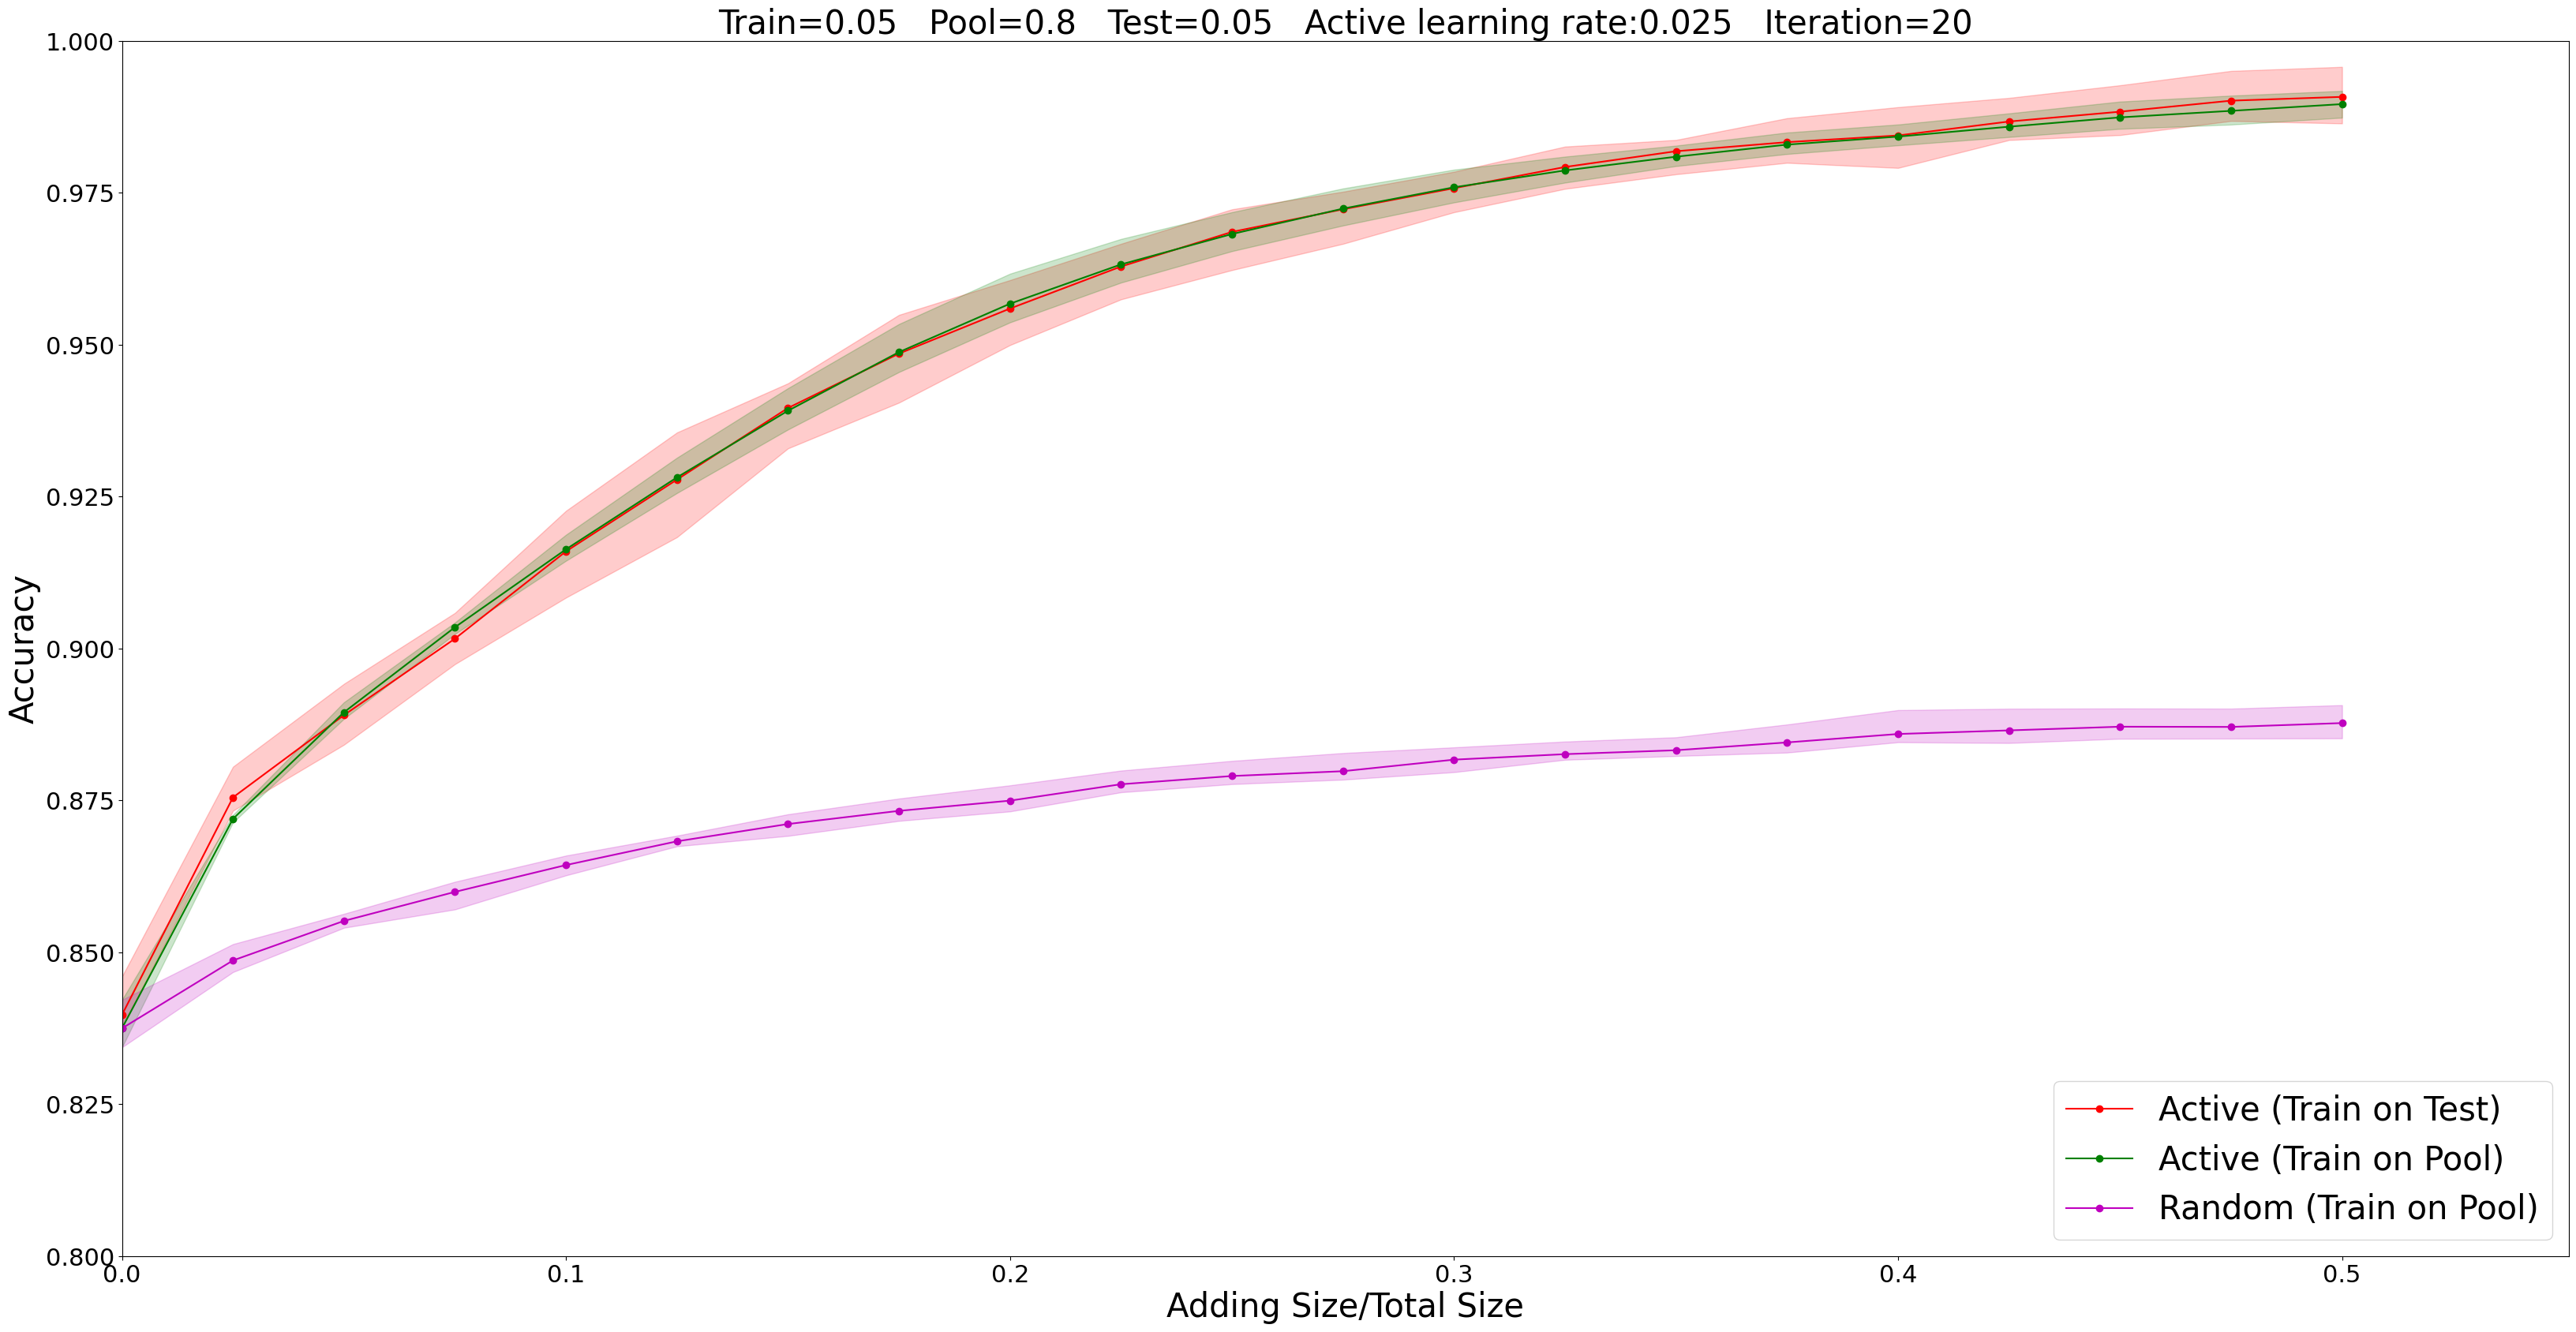

In [159]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [40,20]
plt.rcParams.update({'font.size': 22})
plt.title(f"Train=0.05   Pool=0.8   Test=0.05   Active learning rate:0.025   Iteration=20",fontsize=30)
plt.ylabel('Accuracy' , fontsize=30)
plt.xlabel('Adding Size/Total Size',fontsize=30)
plt.xlim([0.0, .551])
plt.ylim([0.8, 1.0])
itss=[0]*(size_of_iteration+1)

for i in range(size_of_iteration+1):
  itss[i]=med_border*(i)

y_err1 = [[macc_Changed_Train_Remained[i] - lacc_Changed_Train_Remained[i], hacc_Changed_Train_Remained[i] - macc_Changed_Train_Remained[i]] for i in range(size_of_iteration+1)]
y_err2 = [[macc_Changed_Train_On_New_Test[i] - lacc_Changed_Train_On_New_Test[i], hacc_Changed_Train_On_New_Test[i] - macc_Changed_Train_On_New_Test[i]] for i in range(size_of_iteration+1)]
y_err3 = [[macc_different_portion[i] - lacc_different_portion[i], hacc_different_portion[i] - macc_different_portion[i]] for i in range(size_of_iteration+1)]



plt.plot(itss,macc_Changed_Train_On_New_Test,'bo-',color = 'r',label='Active (Train on Test)')
plt.fill_between(itss, lacc_Changed_Train_On_New_Test , hacc_Changed_Train_On_New_Test , alpha=0.2, color='r')

plt.plot(itss,macc_Changed_Train_Remained,'bo-',color = 'g',label='Active (Train on Pool)')
plt.fill_between(itss, lacc_Changed_Train_Remained , hacc_Changed_Train_Remained , alpha=0.2, color='g')

plt.plot(itss,macc_different_portion,'bo-',color = 'm',label='Random (Train on Pool)')
plt.fill_between(itss, lacc_different_portion , hacc_different_portion , alpha=0.2, color='m')


plt.legend(loc="lower right",fontsize=30)

<ipython-input-160-4851de603202>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(itss,macc_Changed_Train_On_Test,'bo-',color = 'r',label='Active (Train on (not changed)Test)')
<ipython-input-160-4851de603202>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(itss,macc_different_portion_On_Test,'bo-',color = 'm',label='Random (Train on (not changed)Test)')


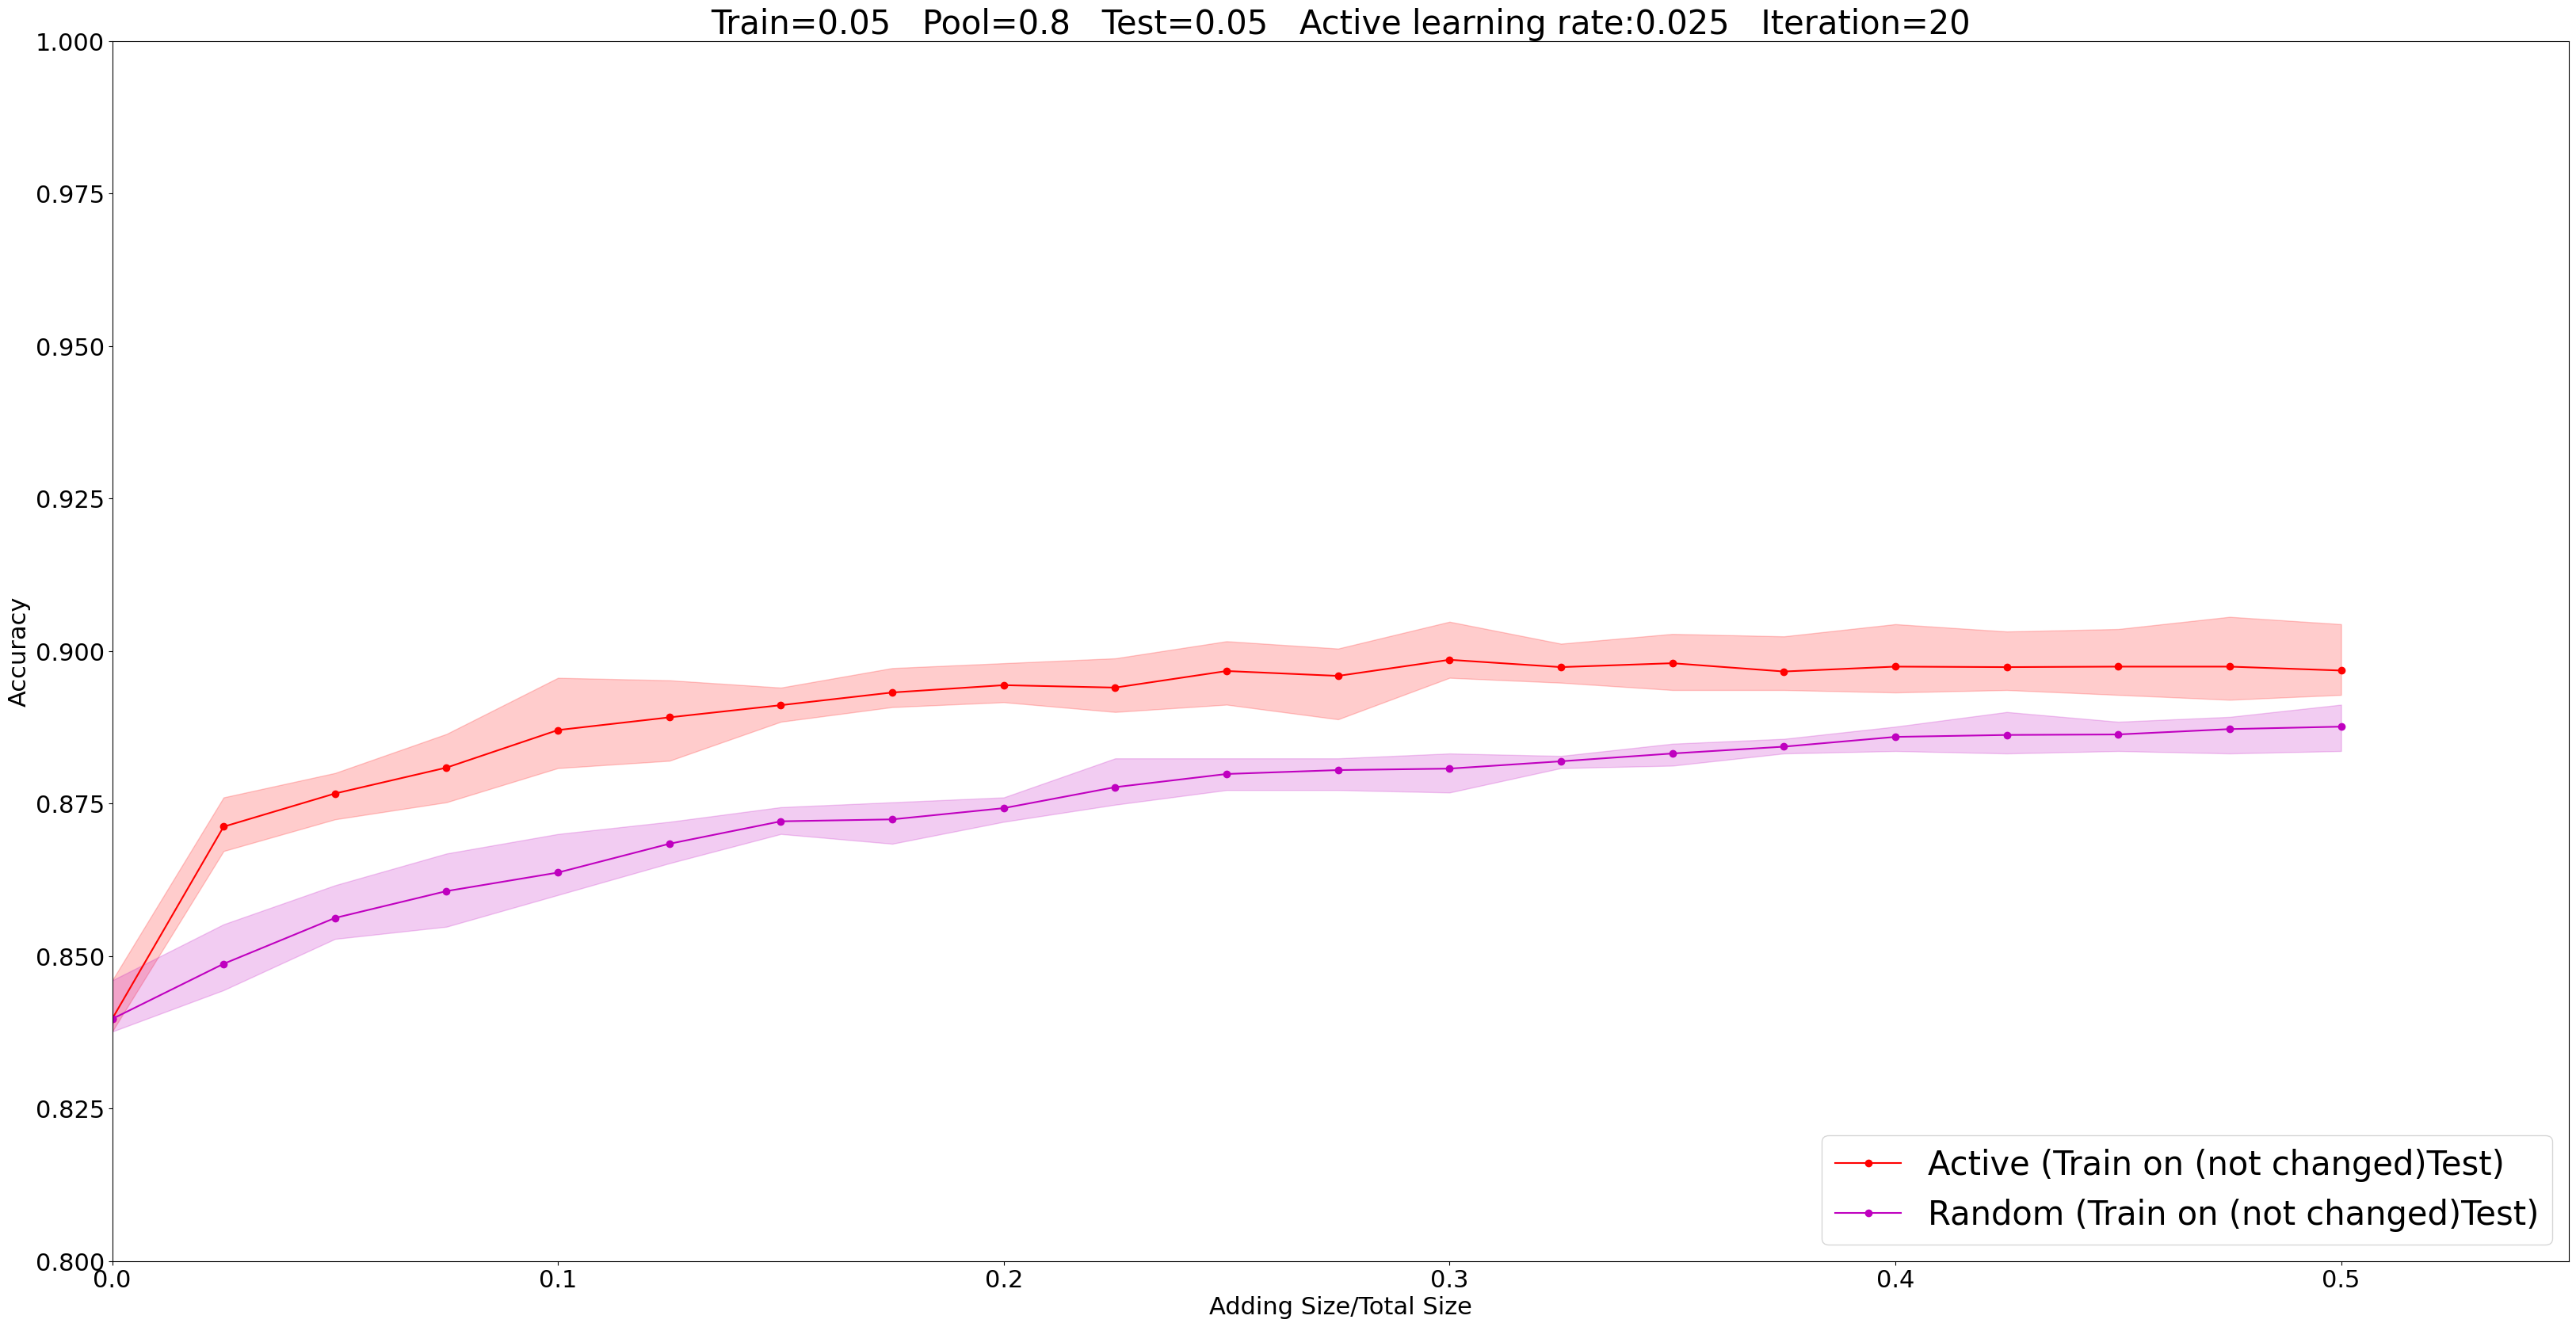

In [160]:
plt.rcParams['figure.figsize'] = [40,20]
plt.rcParams.update({'font.size': 22})
plt.title(f"Train=0.05   Pool=0.8   Test=0.05   Active learning rate:0.025   Iteration=20",fontsize=30)
plt.ylabel('Accuracy')
plt.xlabel('Adding Size/Total Size')
plt.xlim([0.0, .551])
plt.ylim([0.8, 1.0])
itss=[0]*(size_of_iteration+1)

for i in range(size_of_iteration+1):
  itss[i]=med_border*(i)

y_err1 = [[macc_Changed_Train_On_Test[i] - lacc_Changed_Train_On_Test[i], hacc_Changed_Train_On_Test[i] - macc_Changed_Train_On_Test[i]] for i in range(size_of_iteration+1)]
y_err2 = [[macc_different_portion_On_Test[i] - lacc_different_portion_On_Test[i], hacc_different_portion_On_Test[i] - macc_different_portion_On_Test[i]] for i in range(size_of_iteration+1)]

plt.plot(itss,macc_Changed_Train_On_Test,'bo-',color = 'r',label='Active (Train on (not changed)Test)')
plt.fill_between(itss, lacc_Changed_Train_On_Test , hacc_Changed_Train_On_Test, alpha=0.2, color='r')

plt.plot(itss,macc_different_portion_On_Test,'bo-',color = 'm',label='Random (Train on (not changed)Test)')
plt.fill_between(itss, lacc_different_portion_On_Test , hacc_different_portion_On_Test, alpha=0.2, color='m')

plt.legend(loc="lower right",fontsize=30)

<ipython-input-161-60c3726b0d1a>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(itss,macc_Changed_Train_On_New_Test,'bo-',color = 'r',label='Active (Train on Test)')
<ipython-input-161-60c3726b0d1a>:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(itss,macc_Changed_Train_Remained,'bo-',color = 'g',label='Active (Train on Pool)')
<ipython-input-161-60c3726b0d1a>:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(itss,macc_different_portion,'bo-',color = 'm',label='Random (Train on Pool)')
<ipython-input-161-60c3726b0d1a>:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-"

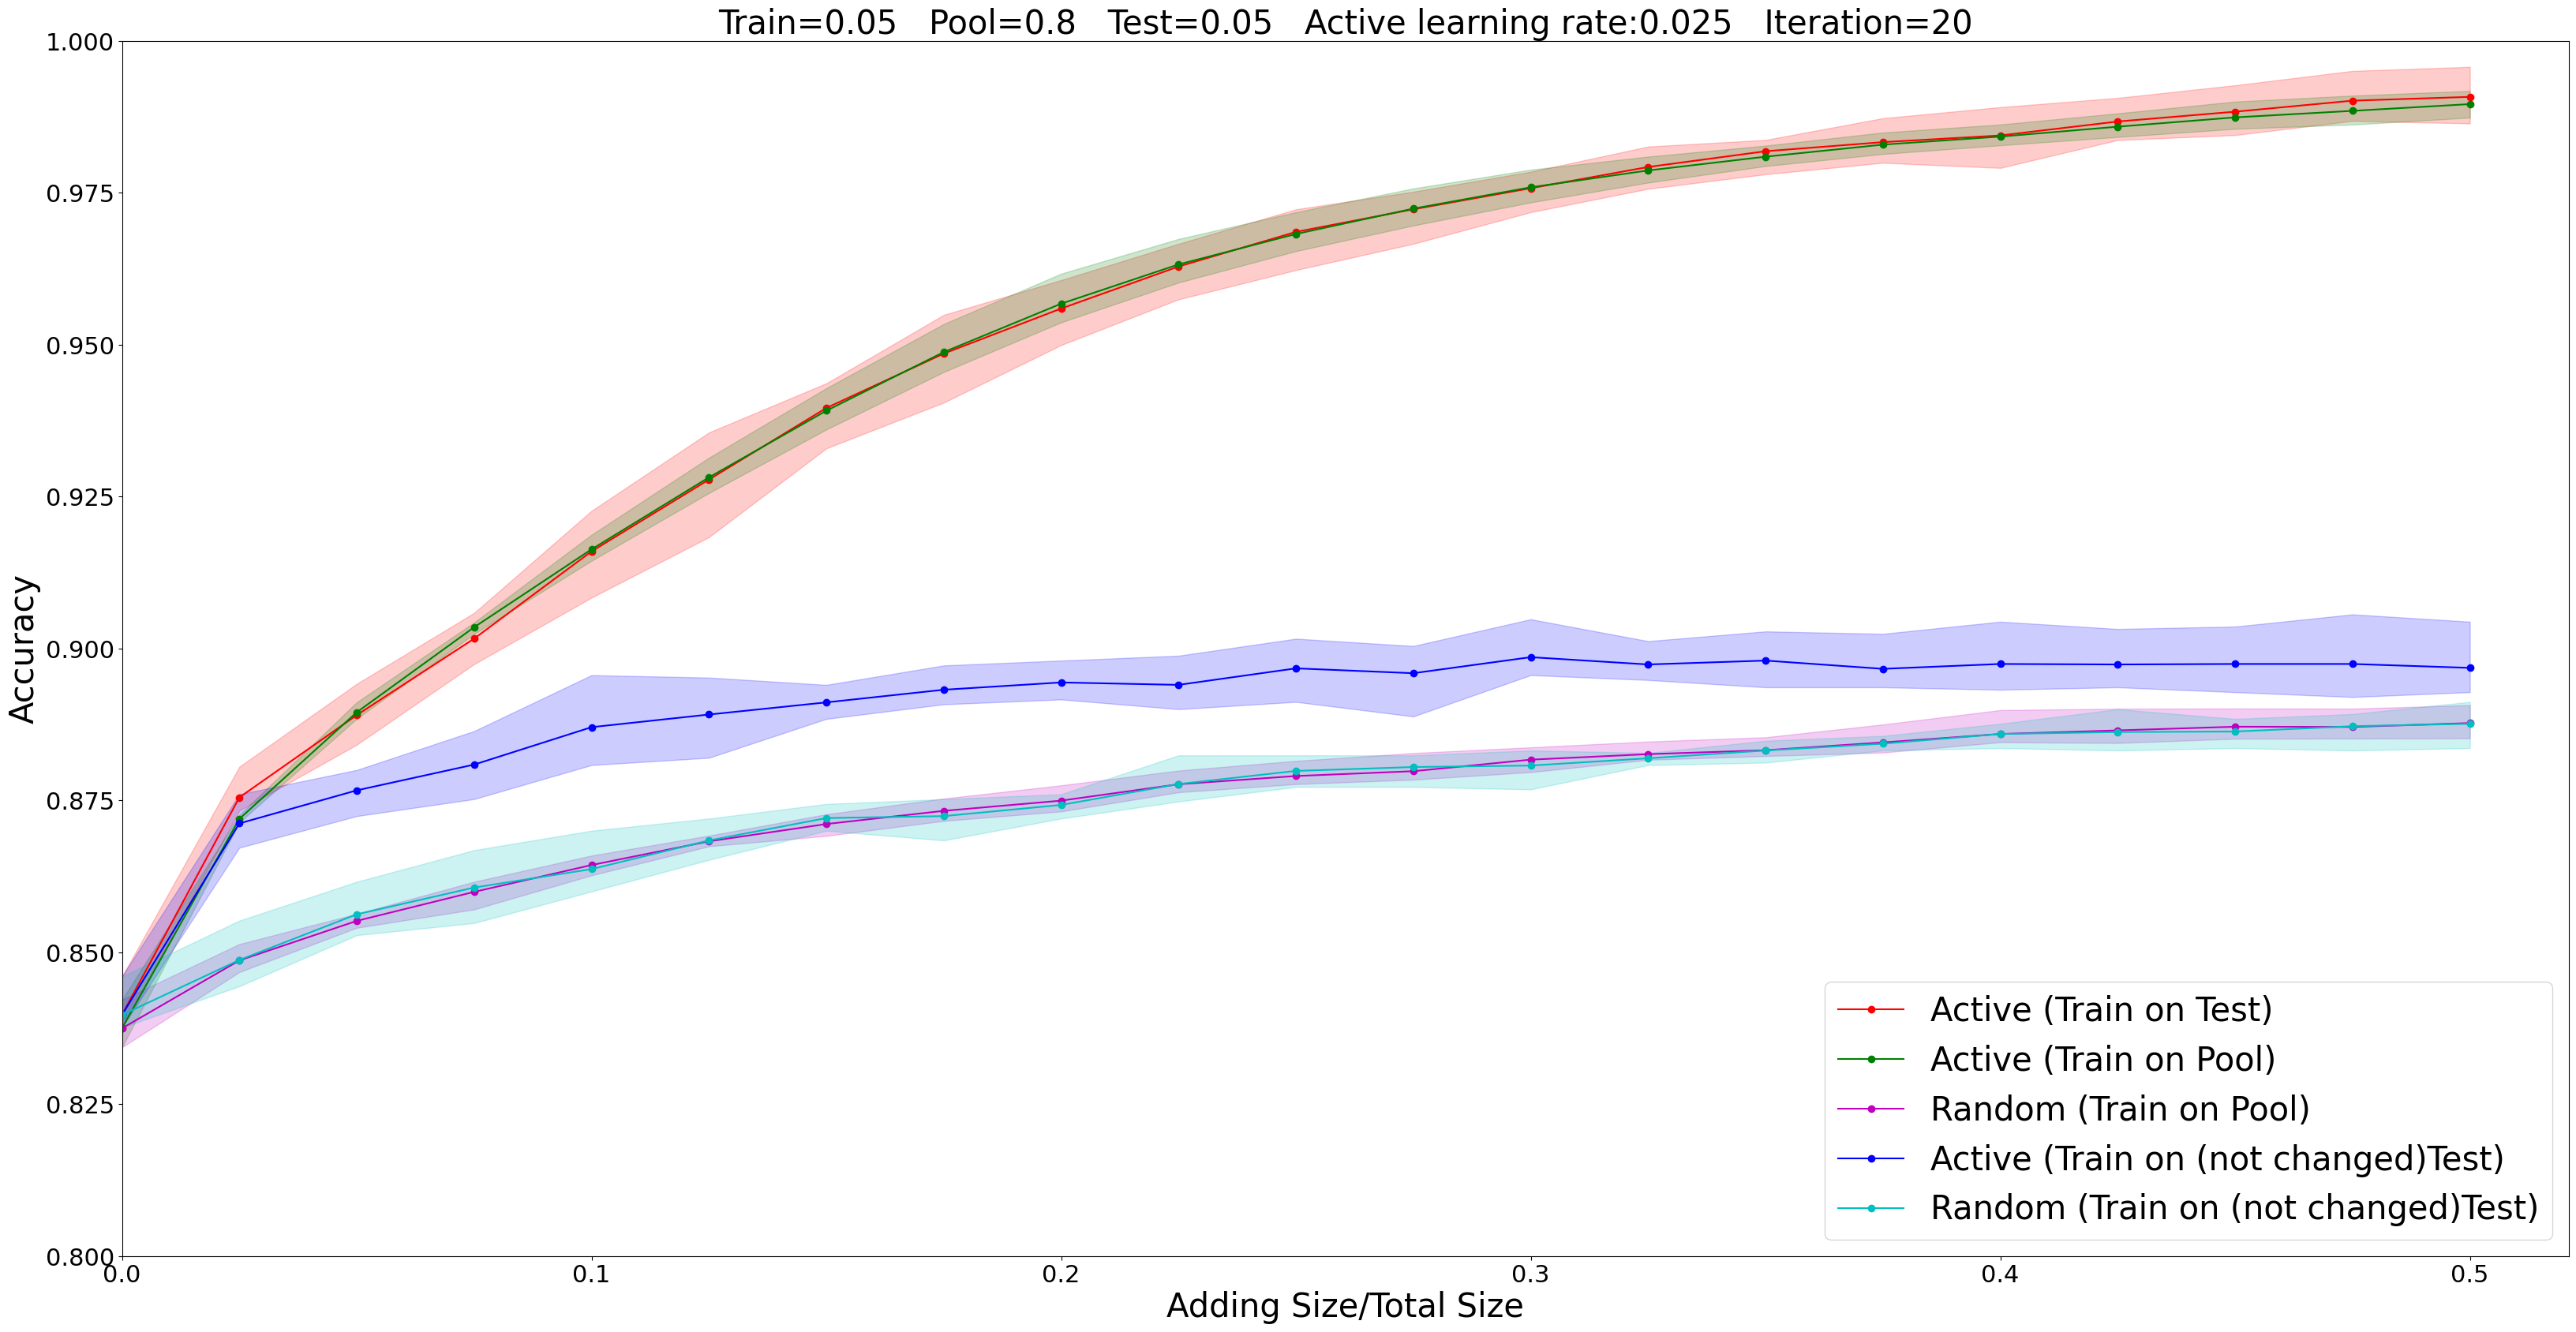

In [161]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [40,20]
plt.rcParams.update({'font.size': 22})
plt.title(f"Train=0.05   Pool=0.8   Test=0.05   Active learning rate:0.025   Iteration=20",fontsize=30)
plt.ylabel('Accuracy' , fontsize=30)
plt.xlabel('Adding Size/Total Size',fontsize=30)
plt.xlim([0.0, .521])
plt.ylim([0.8, 1.0])
itss=[0]*(size_of_iteration+1)

for i in range(size_of_iteration+1):
  itss[i]=med_border*(i)

y_err1 = [[macc_Changed_Train_Remained[i] - lacc_Changed_Train_Remained[i], hacc_Changed_Train_Remained[i] - macc_Changed_Train_Remained[i]] for i in range(size_of_iteration+1)]
y_err2 = [[macc_Changed_Train_On_New_Test[i] - lacc_Changed_Train_On_New_Test[i], hacc_Changed_Train_On_New_Test[i] - macc_Changed_Train_On_New_Test[i]] for i in range(size_of_iteration+1)]
y_err3 = [[macc_different_portion[i] - lacc_different_portion[i], hacc_different_portion[i] - macc_different_portion[i]] for i in range(size_of_iteration+1)]



plt.plot(itss,macc_Changed_Train_On_New_Test,'bo-',color = 'r',label='Active (Train on Test)')
plt.fill_between(itss, lacc_Changed_Train_On_New_Test , hacc_Changed_Train_On_New_Test , alpha=0.2, color='r')

plt.plot(itss,macc_Changed_Train_Remained,'bo-',color = 'g',label='Active (Train on Pool)')
plt.fill_between(itss, lacc_Changed_Train_Remained , hacc_Changed_Train_Remained , alpha=0.2, color='g')

plt.plot(itss,macc_different_portion,'bo-',color = 'm',label='Random (Train on Pool)')
plt.fill_between(itss, lacc_different_portion , hacc_different_portion , alpha=0.2, color='m')

plt.plot(itss,macc_Changed_Train_On_Test,'bo-',color = 'b',label='Active (Train on (not changed)Test)')
plt.fill_between(itss, lacc_Changed_Train_On_Test , hacc_Changed_Train_On_Test, alpha=0.2, color='b')

plt.plot(itss,macc_different_portion_On_Test,'bo-',color = 'c',label='Random (Train on (not changed)Test)')
plt.fill_between(itss, lacc_different_portion_On_Test , hacc_different_portion_On_Test, alpha=0.2, color='c')


plt.legend(loc="lower right",fontsize=30)